# Downloading Images

exaplanation explanation

In [1]:
# first some imports

import matplotlib.pyplot as plt
import imageio

from allensdk.api.queries.image_download_api import ImageDownloadApi

%matplotlib inline

In [2]:
# Define a function for viewing the images we download

def verify_image(file_path, figsize=(18, 22)):
    image = imageio.imread(file_path)

    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(image)

In [3]:
# we will need an instance of the ImageDownloadApi class
image_api = ImageDownloadApi()

### Downloading a single projection image

2018-01-02 16:14:44,781 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/projection_image_download/297225716?downsample=6&range=0,825,0,943,0,4095


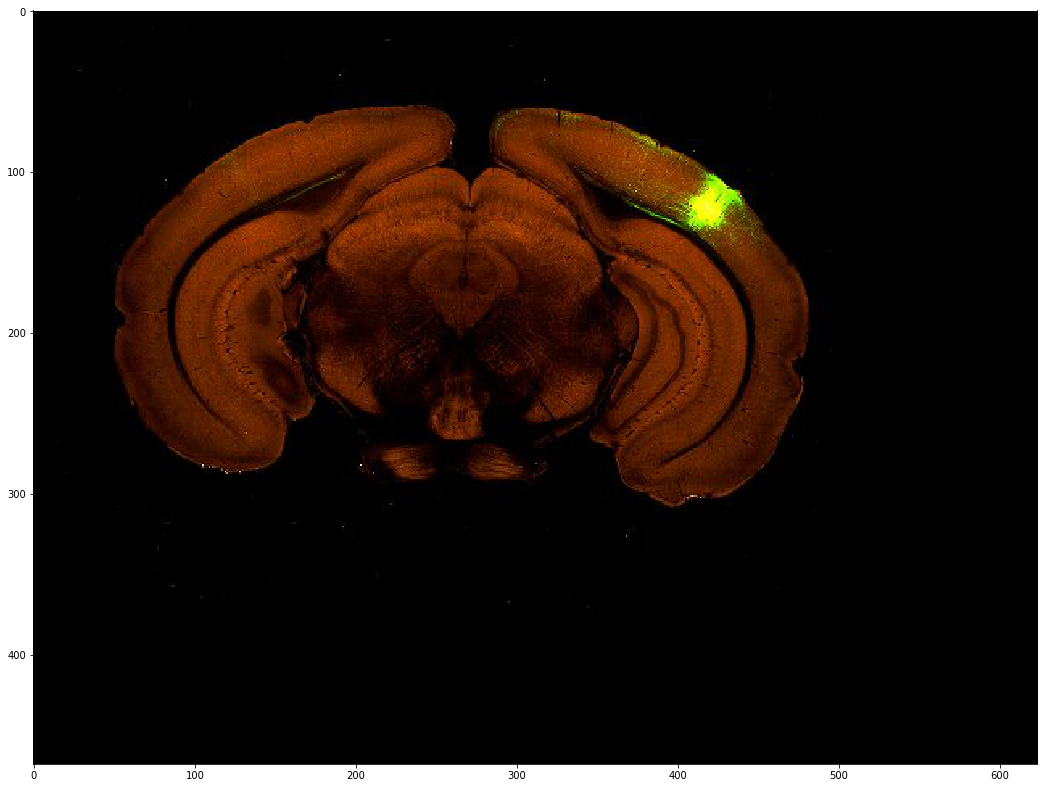

In [4]:
section_image_id = 297225716
downsample = 6
file_path = '297225716_projection_6.jpg'
ranges = image_api.get_section_image_ranges([section_image_id])[0]

image_api.download_projection_image(section_image_id, file_path, downsample=downsample, range=ranges)
verify_image(file_path)

### Downloading a single atlas  image

If we know the id of the atlas image we want, we can download it directly.

2018-01-02 16:14:45,776 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/atlas_image_download/112282603?downsample=6&annotation=false


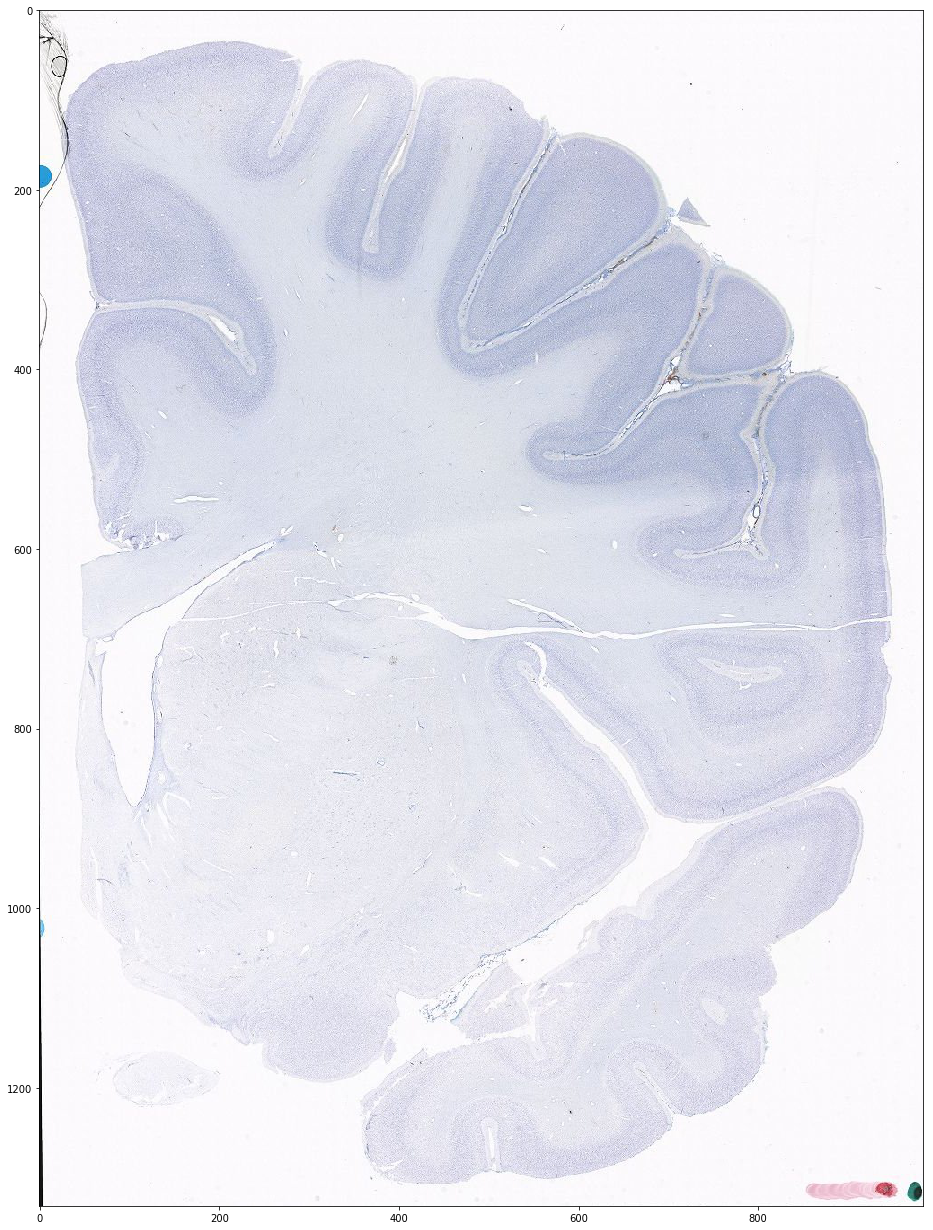

In [5]:
# set up our arguments ...
atlas_image_id = 112282603
annotation = False
downsample = 6
file_path = '112282603_no_annotation_6.jpg'

# ... then use our ImageDownloadApi object to download the image
image_api.download_atlas_image(atlas_image_id, file_path, annotation=annotation, downsample=downsample)

# for verification, we can load up the image as a numpy array and view it in this notebook
verify_image(file_path)

2018-01-02 16:14:46,838 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/atlas_image_download/112282603?downsample=6&annotation=true


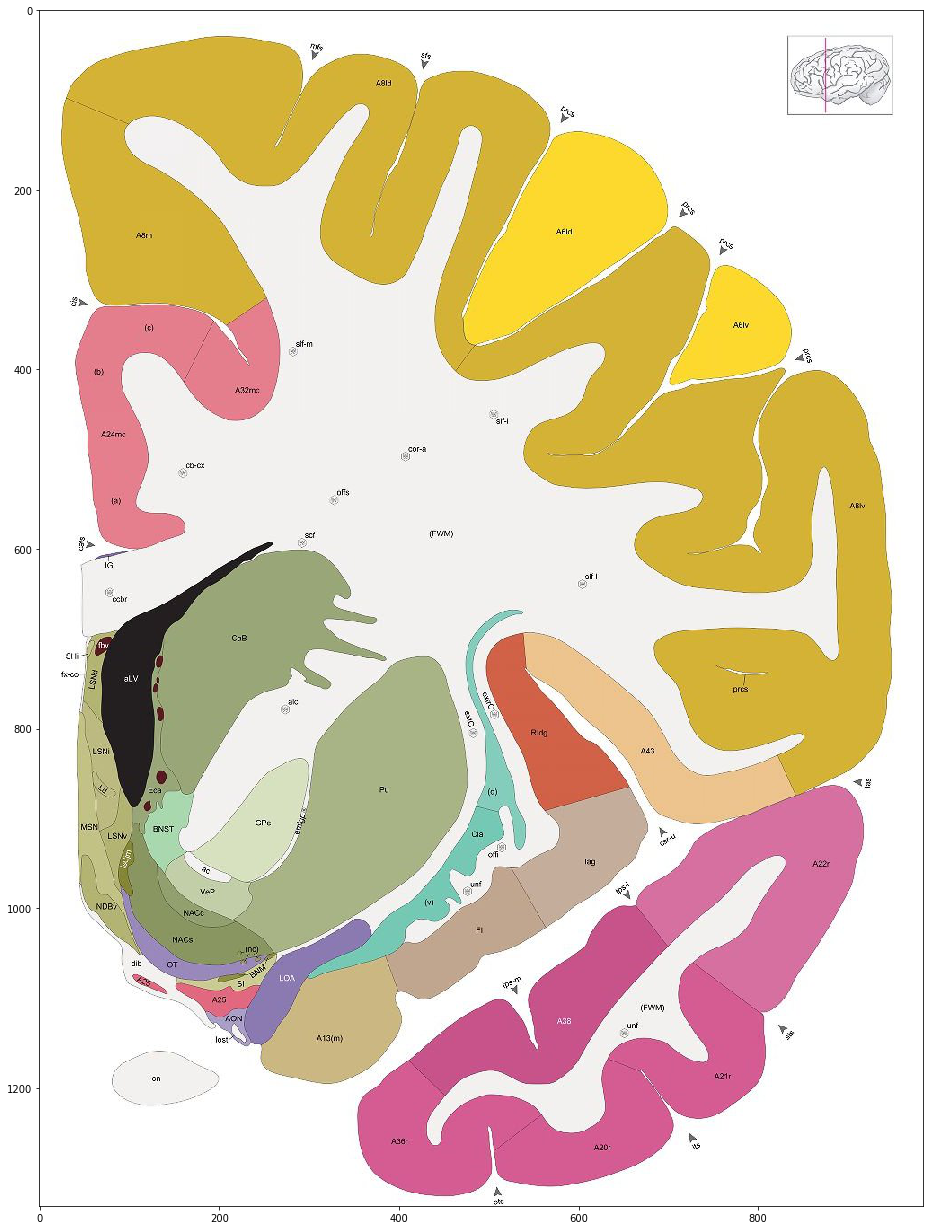

In [6]:
# We can download the structure drawings and labels (instead of the nissl) by setting annotation=True

atlas_image_id = 112282603
annotation = True
downsample = 6
file_path = '112282603_annotation_6.jpg'

image_api.download_atlas_image(atlas_image_id, file_path, annotation=annotation, downsample=downsample)
verify_image(file_path)

### Downloading all of the images in an atlas